In [26]:
import functions
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [27]:
fileName = 'W_B2_6_3.jpg'

In [28]:
img = cv2.imread(f'./sourceImages/{fileName}')

In [29]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
img_1 = grayImg

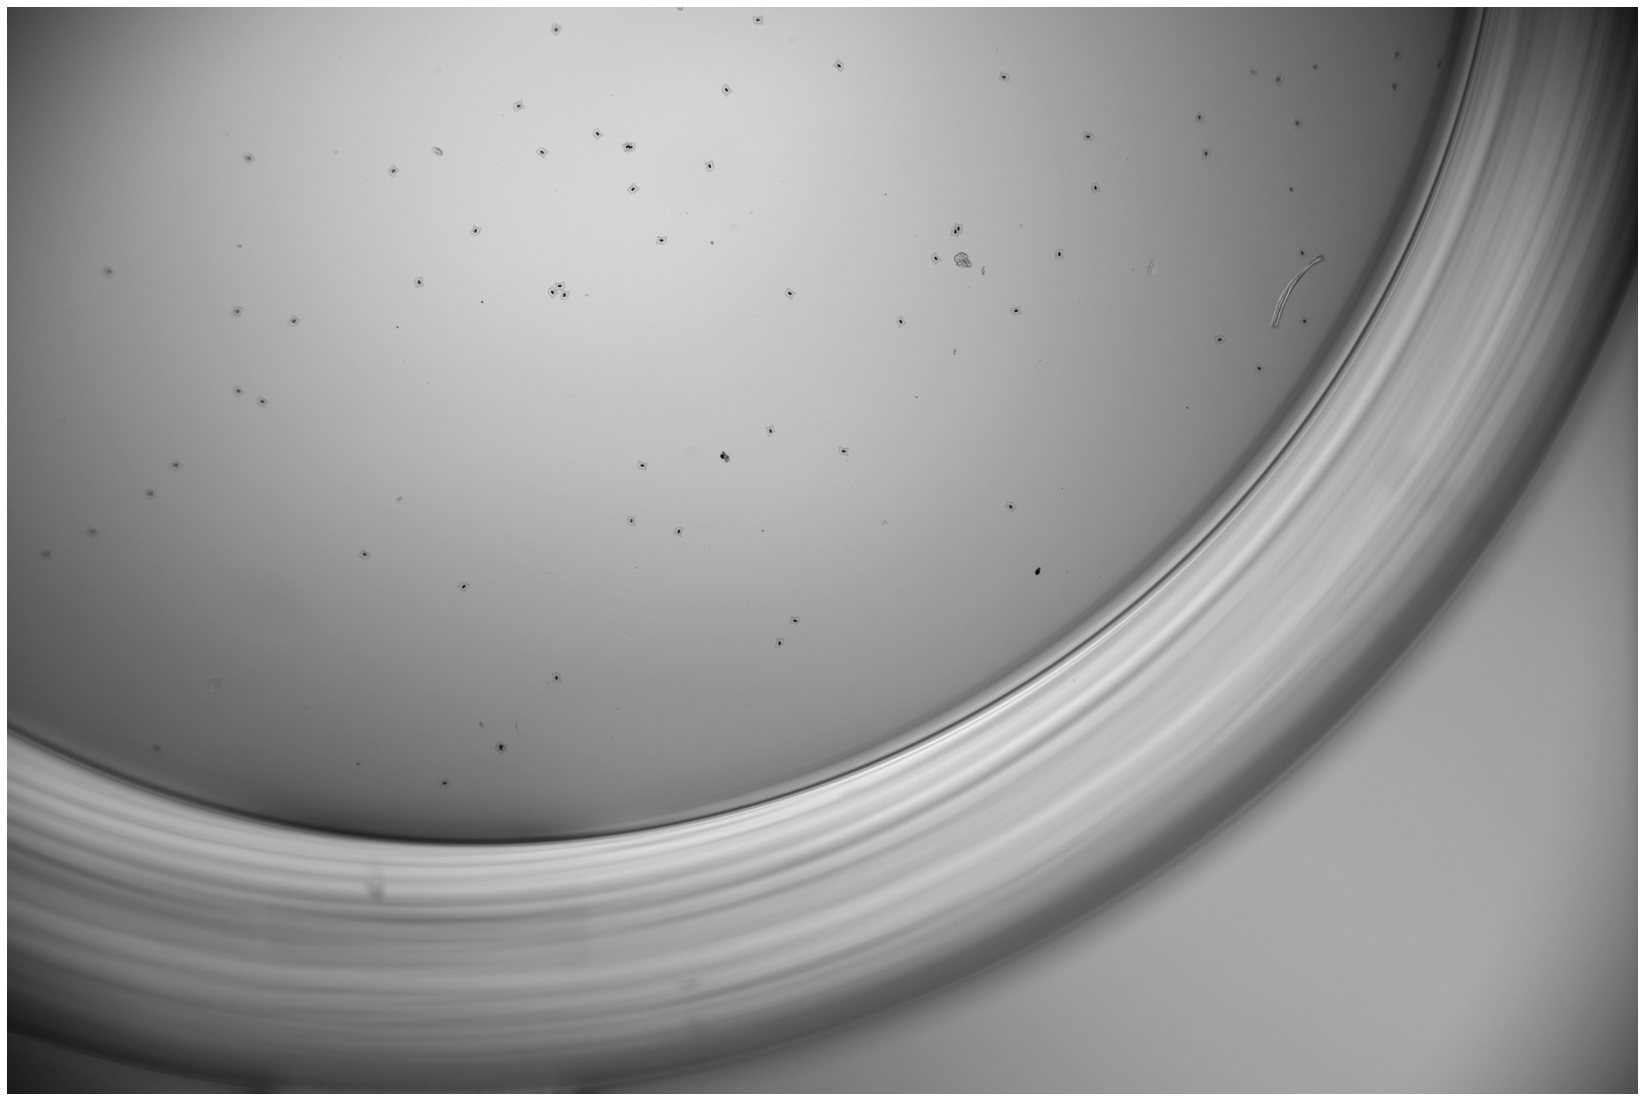

In [31]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_1, cmap='gray')

In [32]:
img_2 = functions.adaptiveThreshold(img_1, kernalSize = 51, offset=-4)

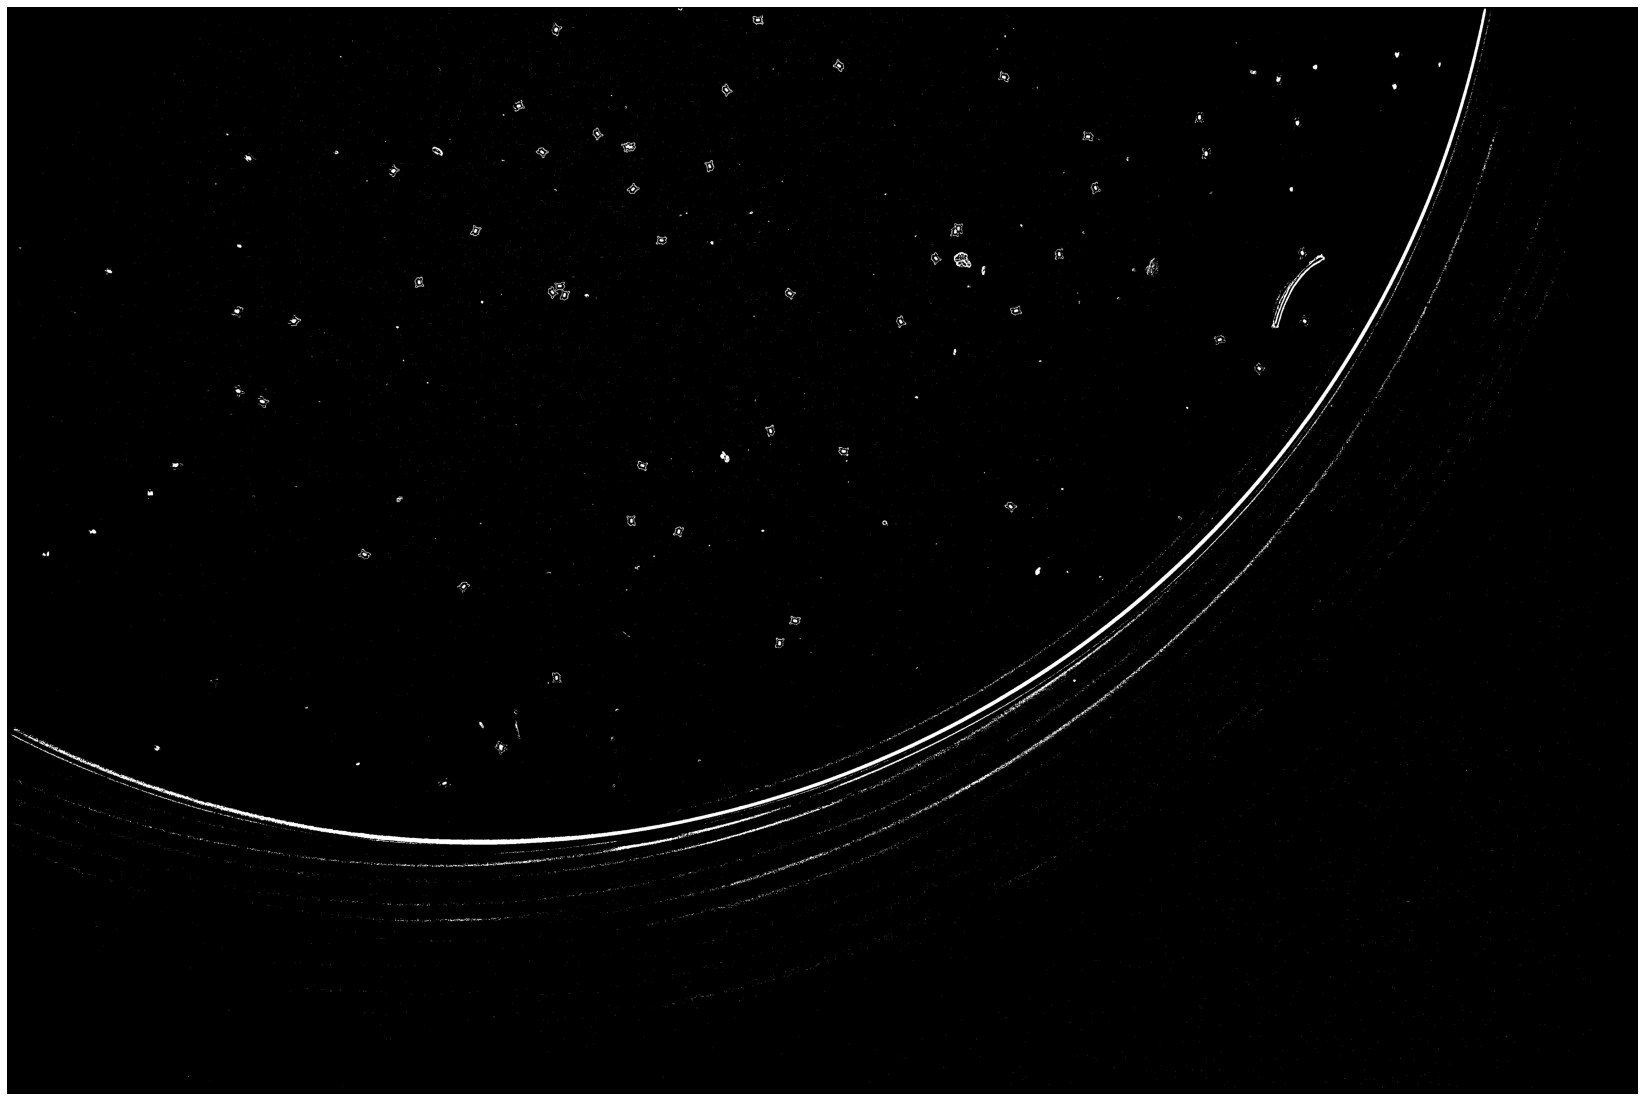

In [33]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_2, cmap='gray')

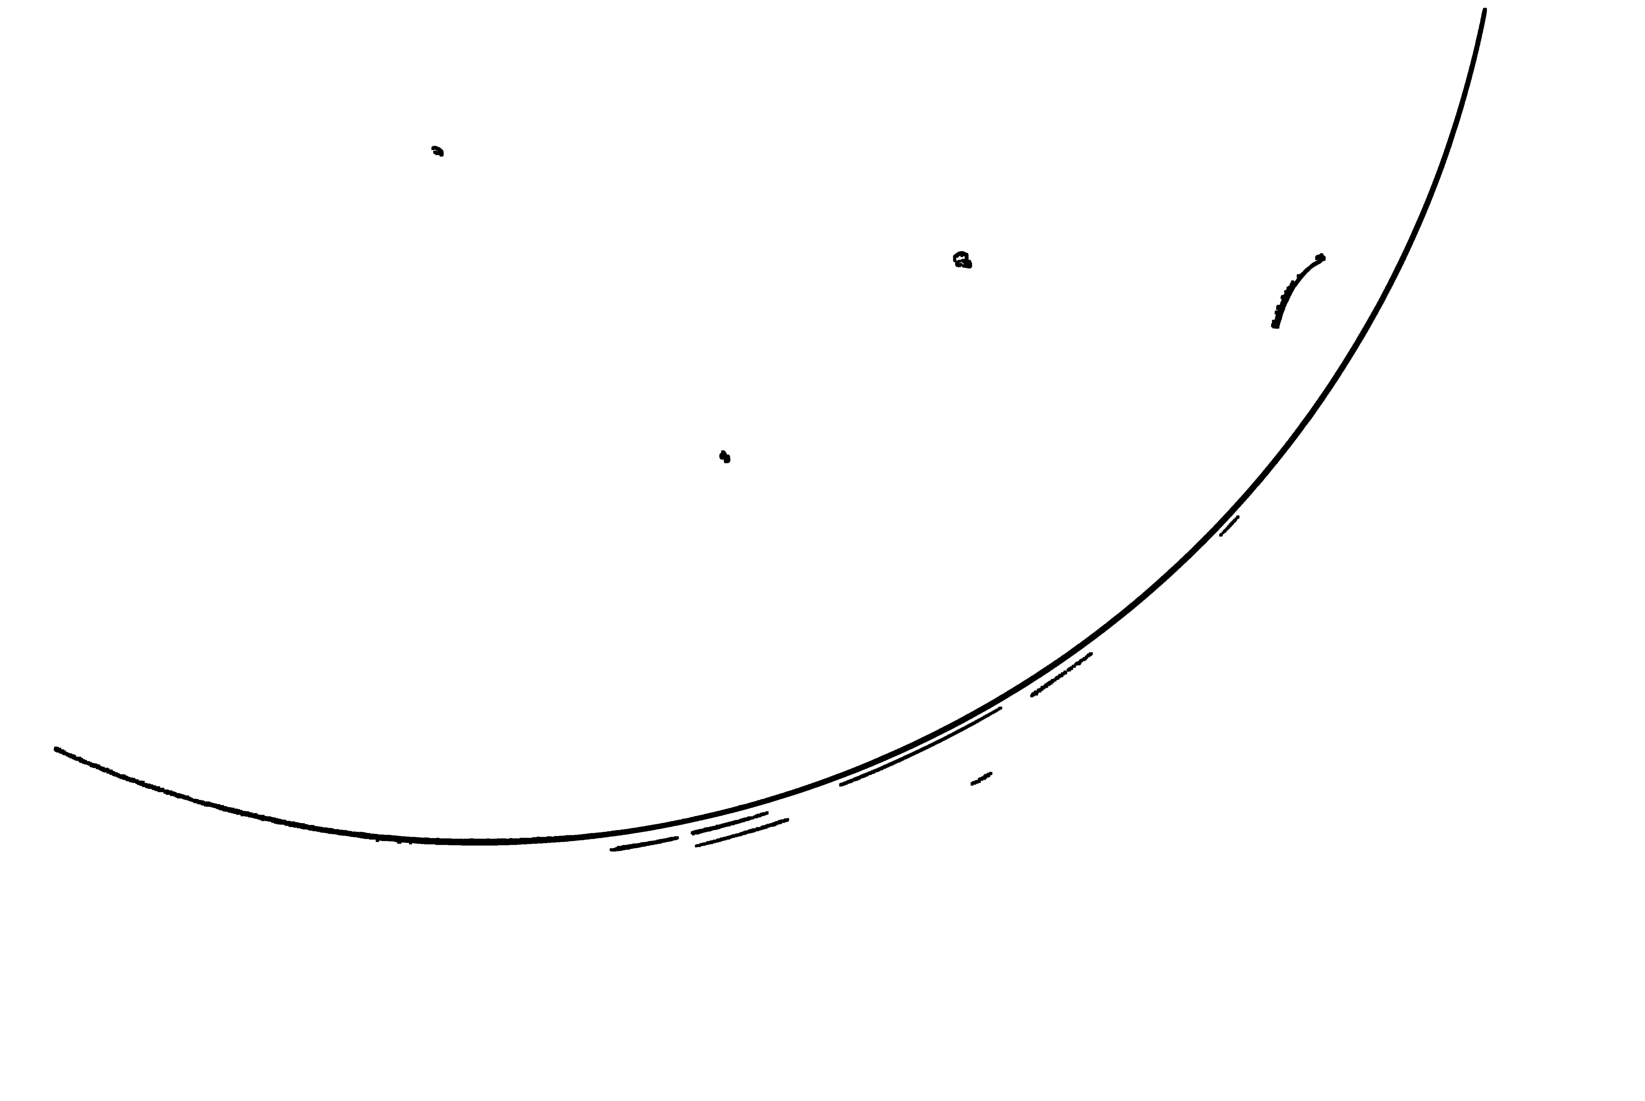

In [34]:
ii = cv2.erode(img_2, np.ones([3, 3]), iterations=1)
ii = cv2.dilate(ii, np.ones([5, 5]), iterations=1)

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(ii)

mask_1 = np.zeros_like(labels, dtype=np.uint8)
for n, s in enumerate(stats):
    if n == 0:
        continue
    if s[-1] > 500:
        mask_1[labels == n] = 1
mask_1 = cv2.dilate(mask_1, np.ones([5, 5]), iterations=1)
mask_1 = np.logical_not(mask_1)

plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(mask_1, cmap='gray')

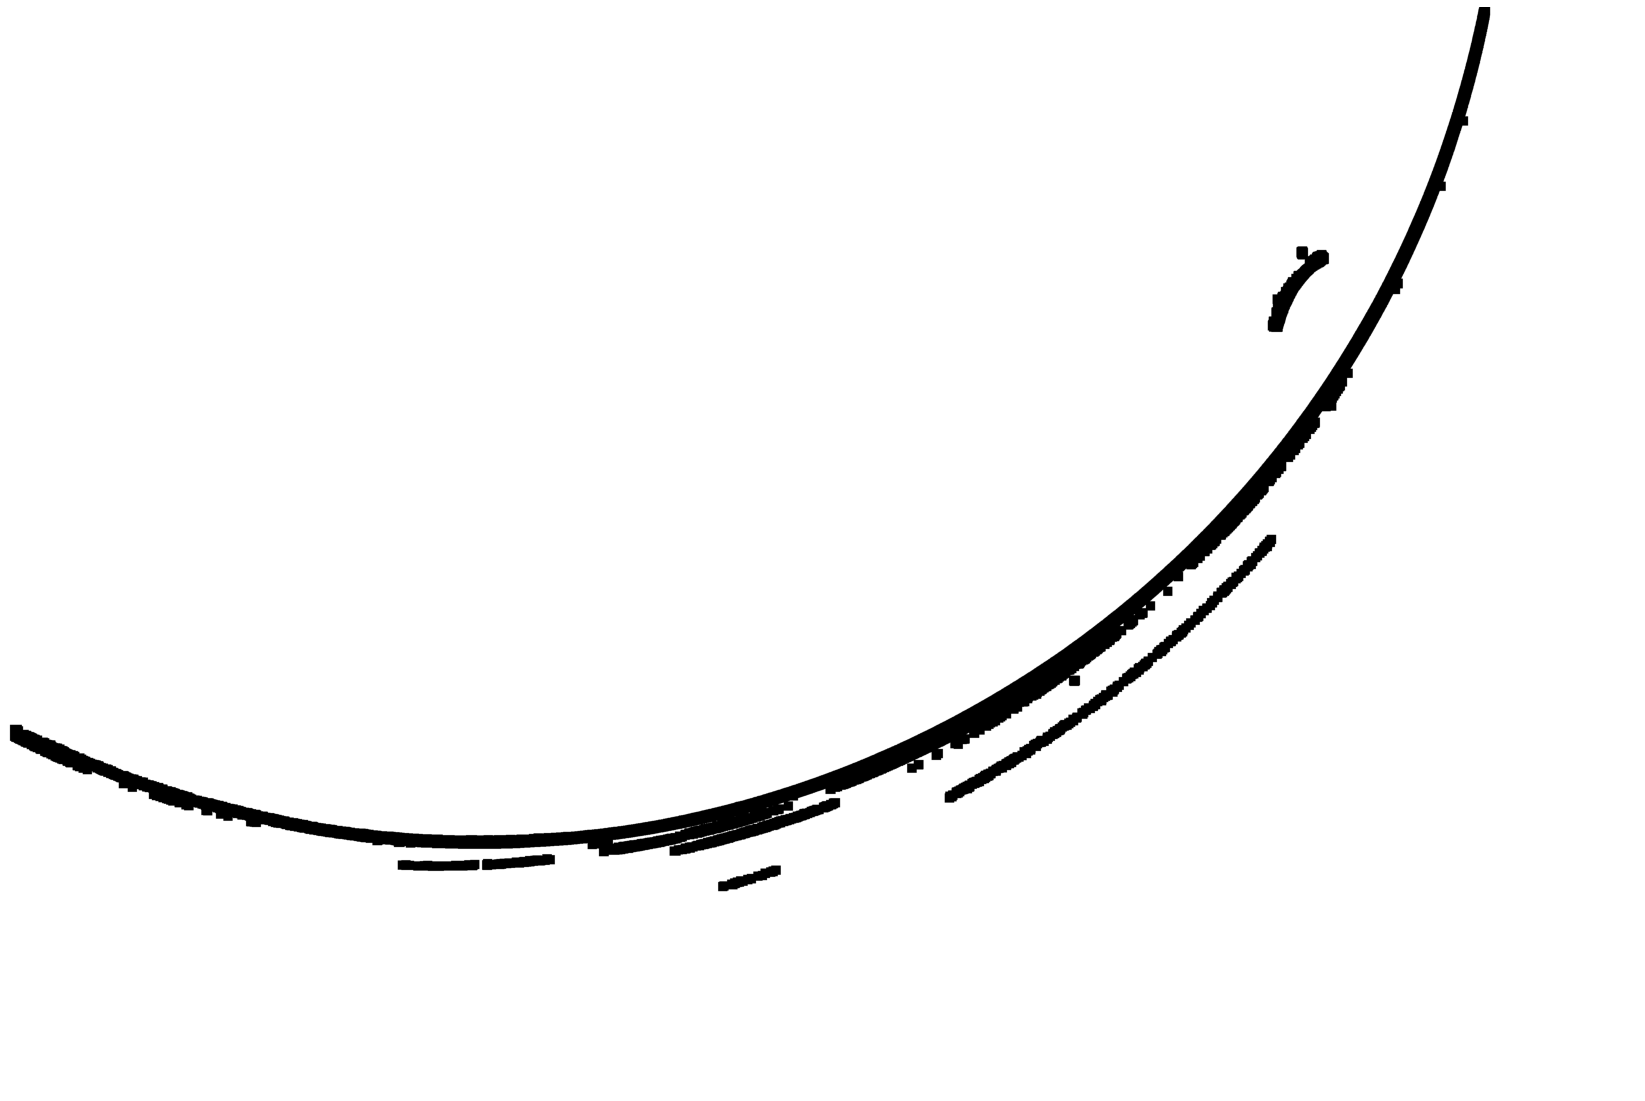

In [35]:
ii = cv2.erode(img_2, np.ones([3, 3]), iterations=1)
ii = cv2.dilate(ii, np.ones([31, 31]), iterations=1)
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(ii)

mask_2 = np.zeros_like(labels, dtype=np.uint8)
for n, s in enumerate(stats):
    if n == 0:
        continue
    if (s[2] > 200) or (s[3] > 200):       
        mask_2[labels == n] = 1
mask_2 = np.logical_not(mask_2)

plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(mask_2, cmap='gray', vmin=0)

In [36]:
mask = np.logical_and(mask_1, mask_2)

In [37]:
img_3 = np.logical_and(img_2, mask) * 1
img_3 = img_3.astype(np.uint8)

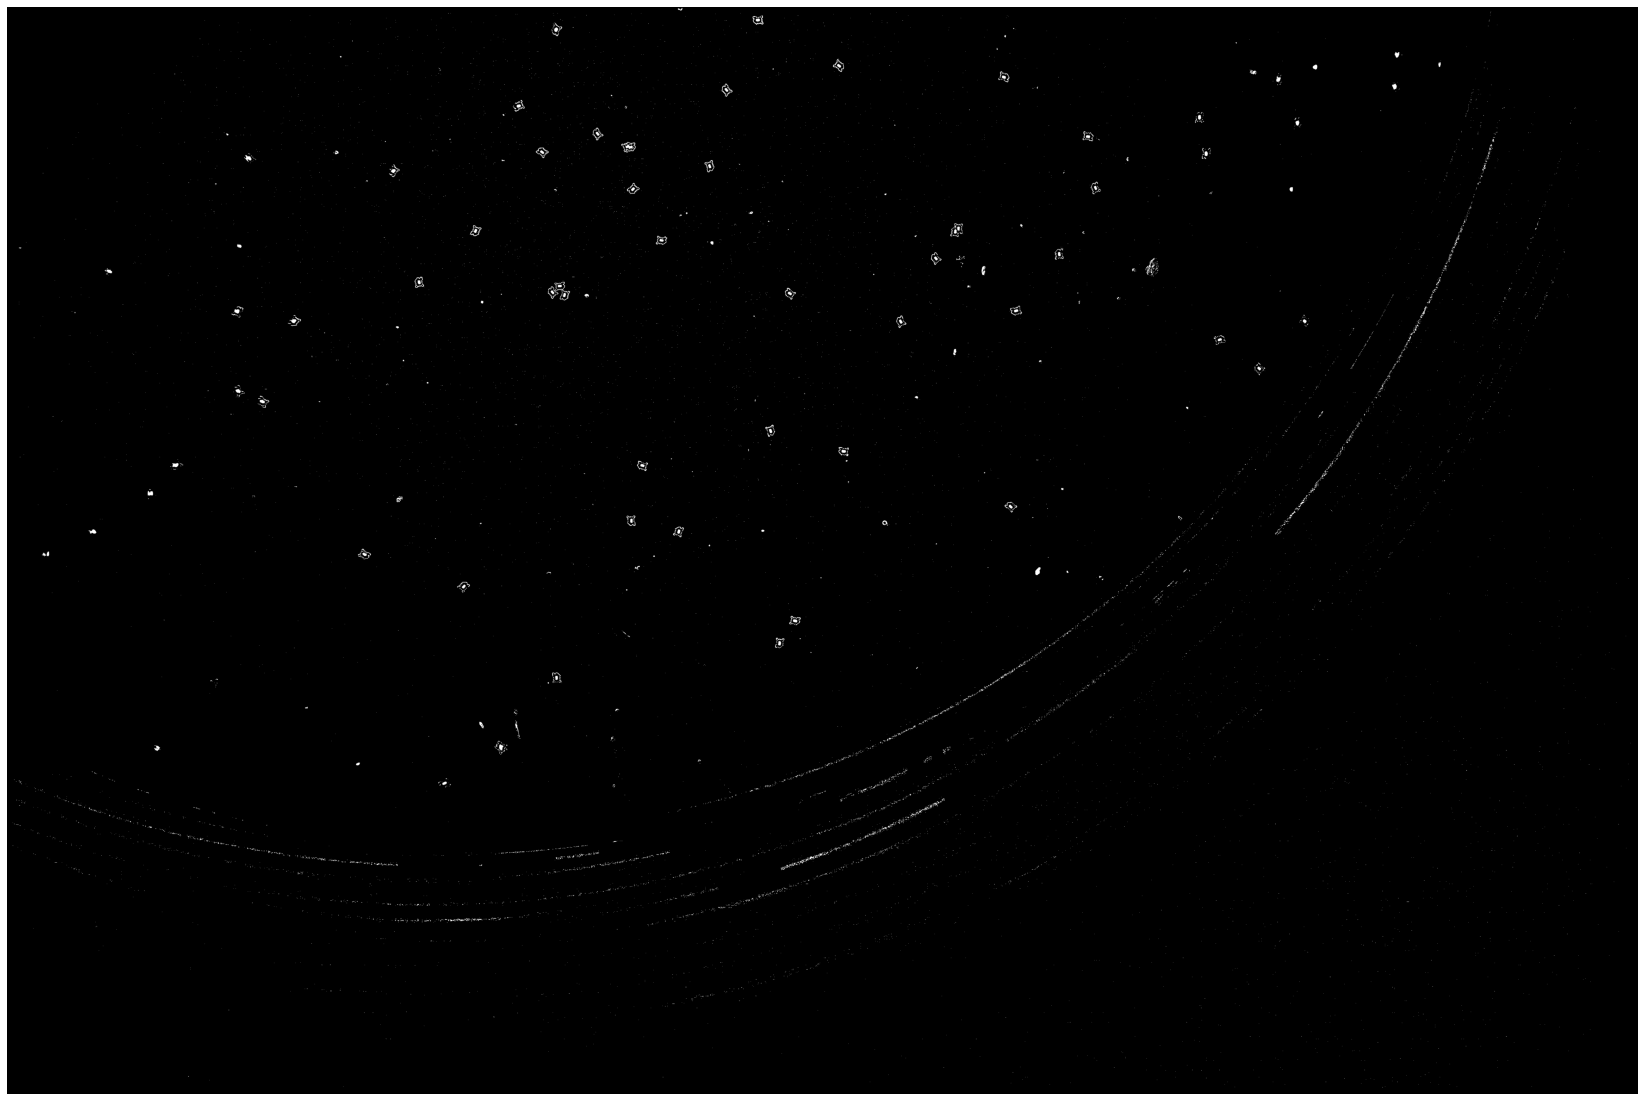

In [38]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_3, cmap='gray')

In [39]:
img_4 = cv2.erode(img_3, np.ones([5, 5]))

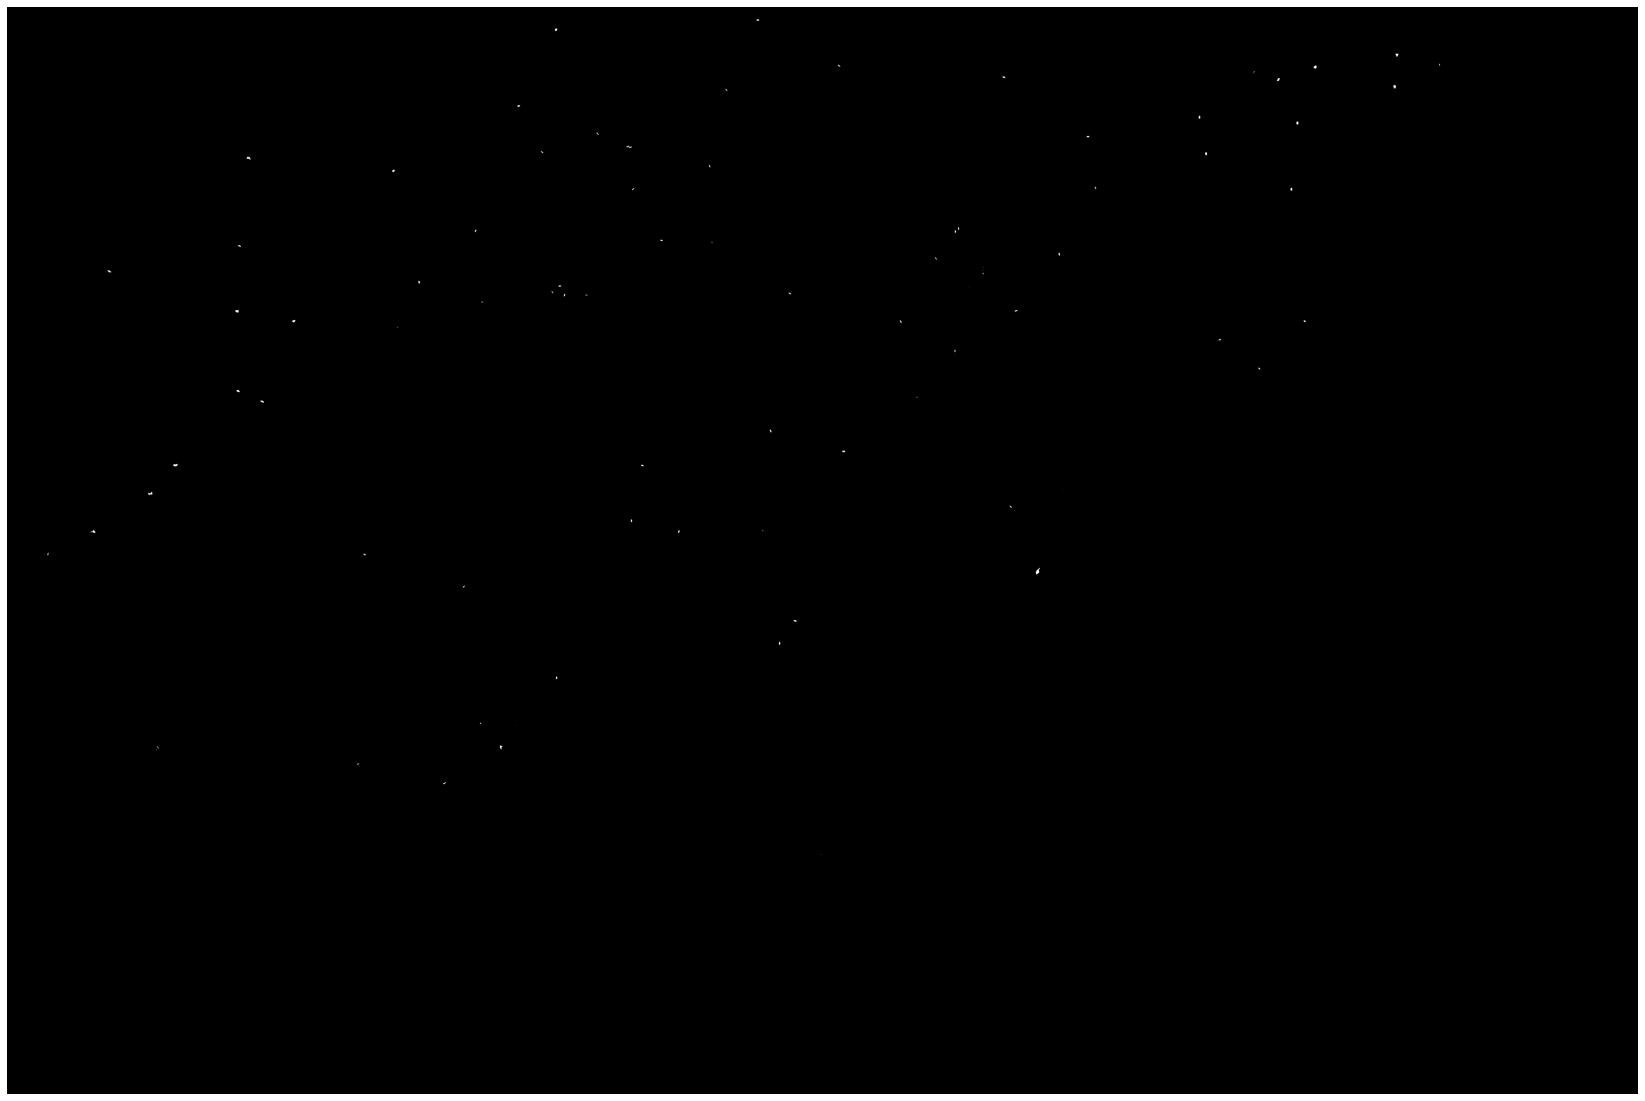

In [40]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_4, cmap='gray')

In [41]:
img_5 = cv2.dilate(img_4, np.ones([5, 5]), iterations=1)

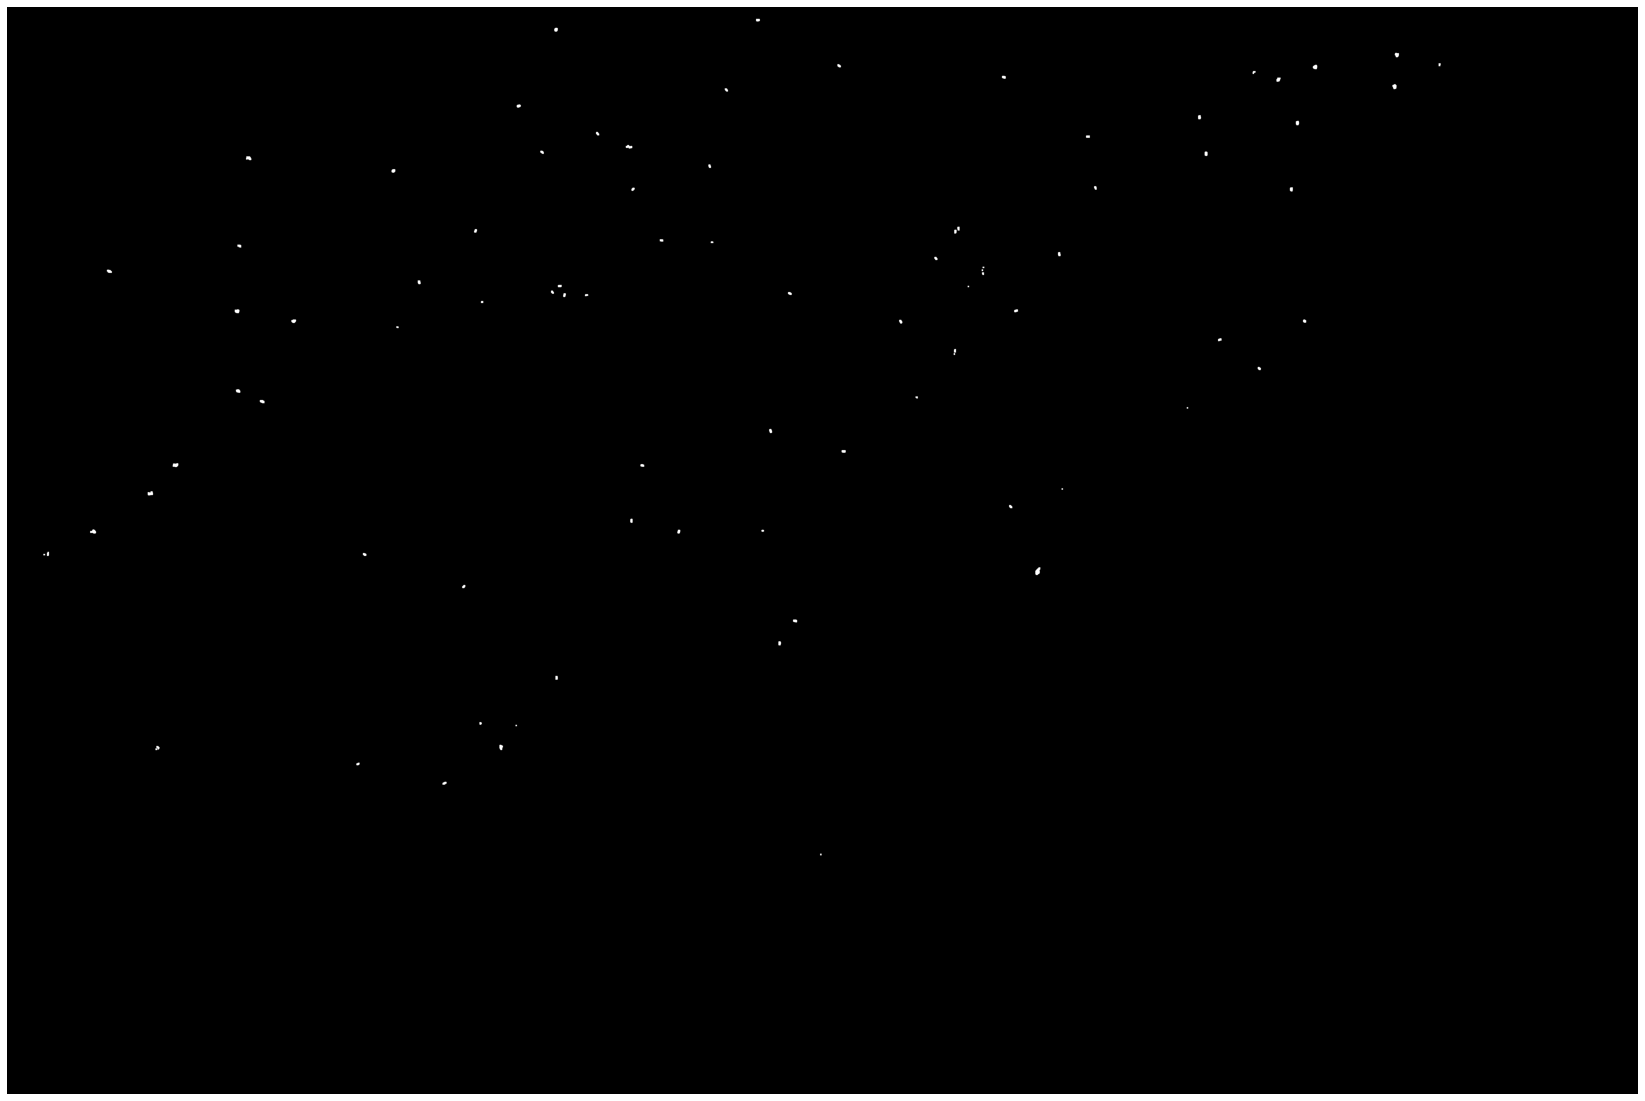

In [42]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_5, cmap='gray')

In [43]:
img_6 = cv2.cvtColor(np.logical_not(img_5).astype(np.uint8)*255, cv2.COLOR_GRAY2BGR)

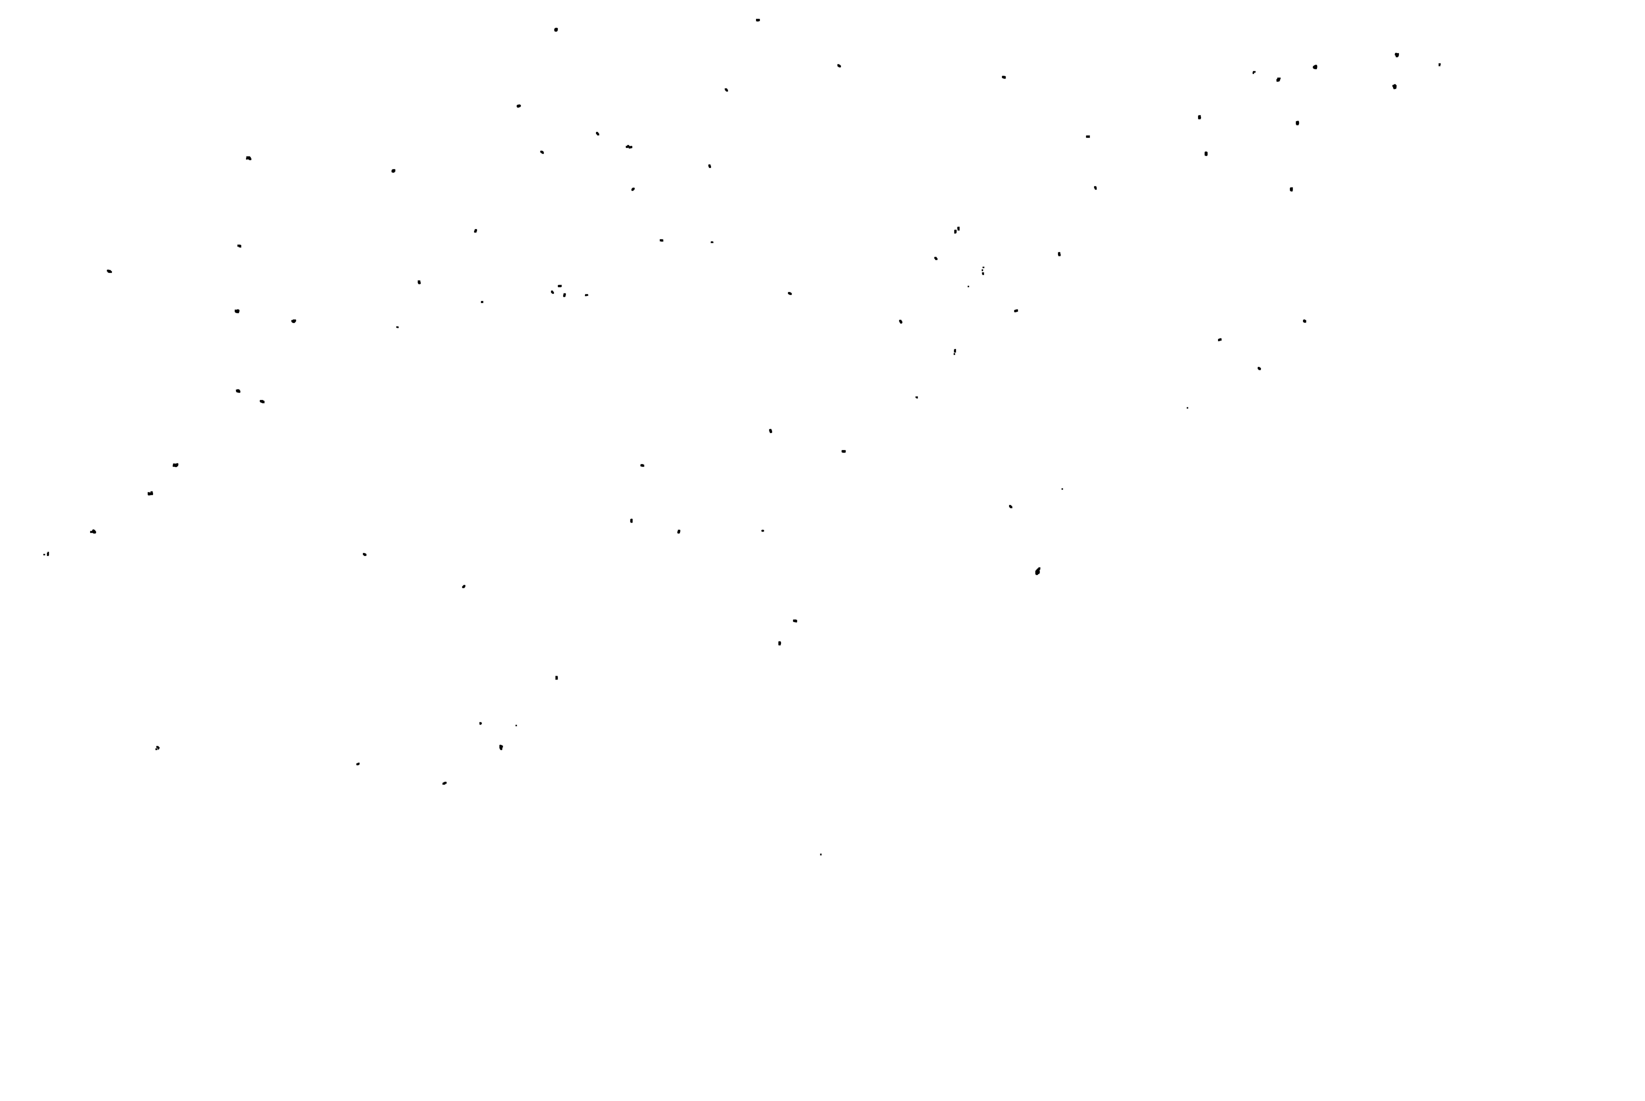

In [44]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_6, cmap='gray')

In [45]:
# cv2.imwrite(f'./resultImages/{fileName}', img_6)

In [46]:
# sample = cv2.imread('./sampleImages/W_A1_0_3_Binary-97.jpg')
# sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
# _, sample = cv2.threshold(sample, 100, 1, cv2.THRESH_BINARY_INV)

# retval, labels, stats, centroids = cv2.connectedComponentsWithStats(sample)
# legal_conponent_count = ((stats[1:, 2] > 5) & (stats[1:, 2] < 14) & (stats[1:, 3] > 5) & (stats[1:, 3] < 14)).sum()
# print('sample bead count =', legal_conponent_count, retval)

In [47]:
# 驗證
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_5)
legal_conponent_count = ((stats[1:, 2] > 5) & (stats[1:, 2] < 14) & (stats[1:, 3] > 5) & (stats[1:, 3] < 14)).sum()
print('result bead count =', legal_conponent_count, retval)

result bead count = 48 87


In [48]:
retval

87